### Learning how to read and write out to files in different directories

In [2]:
# Actually changing the imf.dat file
with open('/home/samantha/fsps/data/imf.dat', 'w') as f:
    f.write('0.08 0.50 1.3\n0.50 1.00 2.3\n1.00 100. 2.3\n') # <- content ^
with open('/home/samantha/fsps/data/imf.dat', 'r') as f:
    content = f.read()
    print(content)

0.08 0.50 1.3
0.50 1.00 2.3
1.00 100. 2.3



-------------
### Changing upper and lower limits on IMF

In [3]:
from matplotlib.pyplot import *
import numpy as np
from prospectFunctions import getObs, getWave, getParams, getModel, getSps
import itertools
import astropy.units as u
import astropy.constants as const
import time
from tqdm import tqdm

In [4]:
imf_type = 5

imf_types = ['Salpeter (1955)', 'Chabrier (2003)', 'Kroupa (2001)', 'van Dokkum (2008)', 'Dave (2008)']

grid_ranges, run_params = getParams(imf_type=imf_type, len_logz=100, len_dust=6, len_tage=100, dust=True)
a = 1.0 + run_params['zred']

logzs = grid_ranges['logzsol']
dusts = grid_ranges['dust2']
tages = grid_ranges['tage']

num_models = len(logzs)*len(dusts)*len(tages)

obs = getObs(**run_params)
sps = getSps(**run_params)
wspec, wphot = getWave(obs=obs, sps=sps, **run_params)

In [4]:
run_params['logzsol'], run_params['dust2'], run_params['tage'] = grid_ranges['logzsol'][0], grid_ranges['dust2'][0], grid_ranges['tage'][0]
run_params

{'imf_type': 5,
 'zred': 3.548,
 'mass': 100000000.0,
 'add_duste': False,
 'zcontinuous': 1,
 'logzsol': np.float64(-1.0),
 'dust2': np.float64(0.0),
 'tage': np.float64(0.1)}

In [6]:
data_grid_spec = np.load('specs_imf_2_60000.npy')

In [10]:
x = np.linspace(0.08,0.5,10)
y = np.power(x, -1.3) * (np.power(0.5,-2.3)/np.power(0.5,-1.3))
#y = np.logspace(np.log10(.08**(-1.3)),np.log10(0.5**(-1.3)),10)

x2 = np.linspace(0.5,1,10)
y2 = np.power(x2, -2.3) #np.logspace(np.log10(0.5**(-2.3)),np.log10(1**(-2.3)),10)

x3 = np.linspace(1.0,120,10)
y3 = np.power(x3, -2.3) #np.logspace(np.log10(1**(-2.3)),np.log10(120**(-2.3)),10)

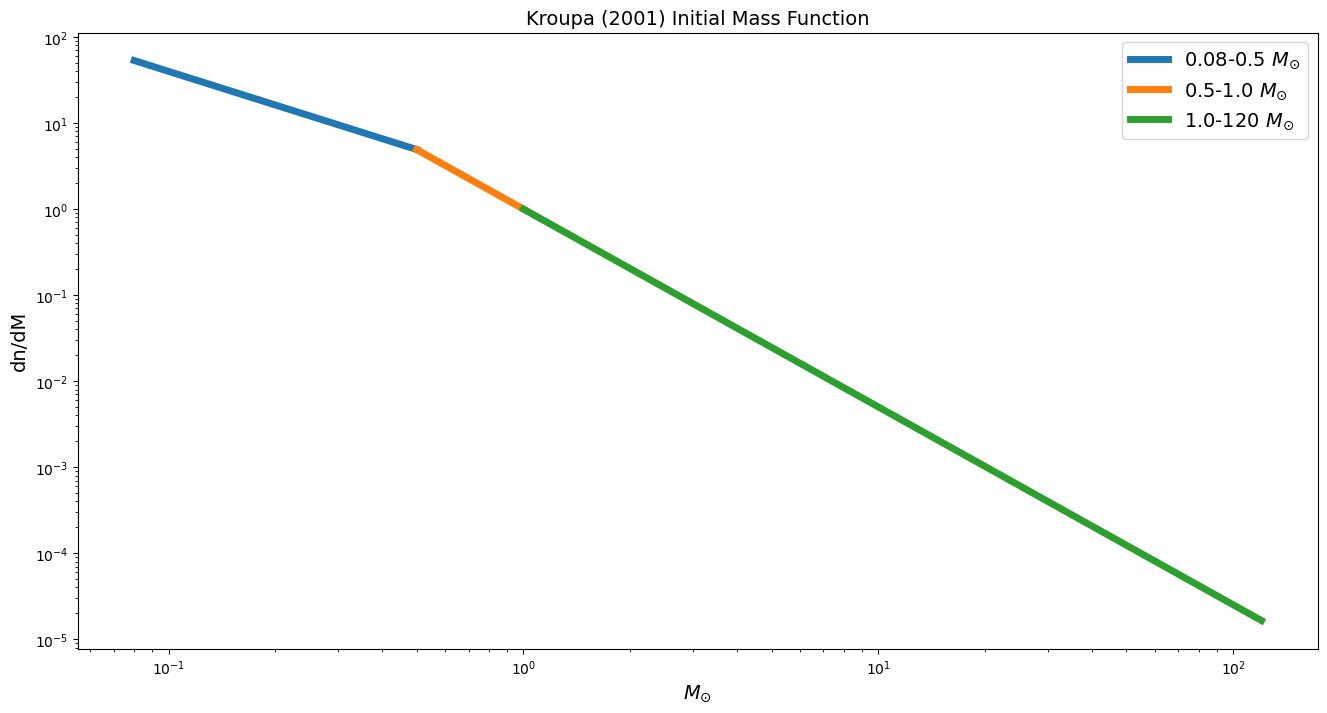

In [23]:
figure(figsize=(16,8))

loglog(x,y, lw=5, label=r'0.08-0.5 $M_{\odot}$')
loglog(x2,y2, lw=5, label=r'0.5-1.0 $M_{\odot}$')
loglog(x3,y3,lw=5, label=r'1.0-120 $M_{\odot}$')

# xscale('log')
# yscale('log')

xlabel(r'$M_{\odot}$', fontsize=14)
ylabel('dn/dM', fontsize=14)

legend(fontsize=14)

title_text = f'Kroupa (2001) Initial Mass Function'
title(title_text, fontsize=14)

# savefig('imf_plot.png')

show()

------
#### Actually trying it out

In [7]:
from matplotlib.pyplot import *
import numpy as np
from prospectFunctions import getObs, getWave, getParams, getModel, getSps
import itertools
import astropy.units as u
import astropy.constants as const
import time
from tqdm import tqdm

In [9]:
imf_type = 5

# imf_types = ['Salpeter (1955)', 'Chabrier (2003)', 'Kroupa (2001)', 'van Dokkum (2008)', 'Dave (2008)']

grid_ranges, run_params = getParams(imf_type=imf_type, len_logz=100, len_dust=6, len_tage=100, dust=True)
a = 1.0 + run_params['zred']

logzs = grid_ranges['logzsol']
dusts = grid_ranges['dust2']
tages = grid_ranges['tage']

obs = getObs(**run_params)
sps = getSps(**run_params)
wspec, wphot = getWave(obs=obs, sps=sps, **run_params)

In [18]:
specs = []

imf_type = 5
run_params['imf_type'] = imf_type
run_params['logzsol'] = logzs[0]
run_params['dust2'] = dusts[0]
run_params['tage'] = tages[0]
test_imfs = ['0.08 0.50 1.8\n0.50 1.00 2.8\n1.00 80. 2.8\n',
             '0.08 0.50 1.3\n0.50 1.00 2.3\n1.00 80. 2.3\n',
             '0.08 0.50 1.8\n0.50 1.00 2.8\n1.00 120. 2.8\n',
             '0.08 0.50 1.3\n0.50 1.00 2.3\n1.00 120. 2.3\n']

for test in tqdm(test_imfs):
    with open('/home/samantha/fsps/data/imf.dat', 'w') as f:
        f.write(test) # <- content ^

    with open('/home/samantha/fsps/data/imf.dat', 'r') as f:
        content = f.read()
        print(content)
        print()

    sps = getSps(**run_params)

    model = getModel(**run_params)
    init_spec, init_phot, init_mfrac = model.predict(model.theta, obs=obs, sps=sps)

    specs.append(init_spec)

  0%|                                                                                   | 0/4 [00:00<?, ?it/s]

0.08 0.50 1.8
0.50 1.00 2.8
1.00 80. 2.8




 25%|██████████████████▊                                                        | 1/4 [00:52<02:37, 52.47s/it]

 FUNCINT ERROR:   79.539991455000006        101.51514740000000     
 FUNCINT ERROR:   79.076165860000003        101.62762497500000     
 FUNCINT ERROR:   79.847694320000002        102.41834242499999     
 FUNCINT ERROR:   79.200223205000000        94.373871934999997     
 FUNCINT ERROR:   79.969380264999998        87.296996524999997     
0.08 0.50 1.3
0.50 1.00 2.3
1.00 80. 2.3




 50%|█████████████████████████████████████▌                                     | 2/4 [01:42<01:41, 50.93s/it]

 FUNCINT ERROR:   79.539991455000006        101.51514740000000     
 FUNCINT ERROR:   79.076165860000003        101.62762497500000     
 FUNCINT ERROR:   79.847694320000002        102.41834242499999     
 FUNCINT ERROR:   79.200223205000000        94.373871934999997     
 FUNCINT ERROR:   79.969380264999998        87.296996524999997     
0.08 0.50 1.8
0.50 1.00 2.8
1.00 120. 2.8




 75%|████████████████████████████████████████████████████████▎                  | 3/4 [02:31<00:50, 50.00s/it]

0.08 0.50 1.3
0.50 1.00 2.3
1.00 120. 2.3




100%|███████████████████████████████████████████████████████████████████████████| 4/4 [03:20<00:00, 50.12s/it]


In [23]:
len(specs[0])

5994

------
#### Actually trying it out (again but changing imf_upper & imf_lower bounds)

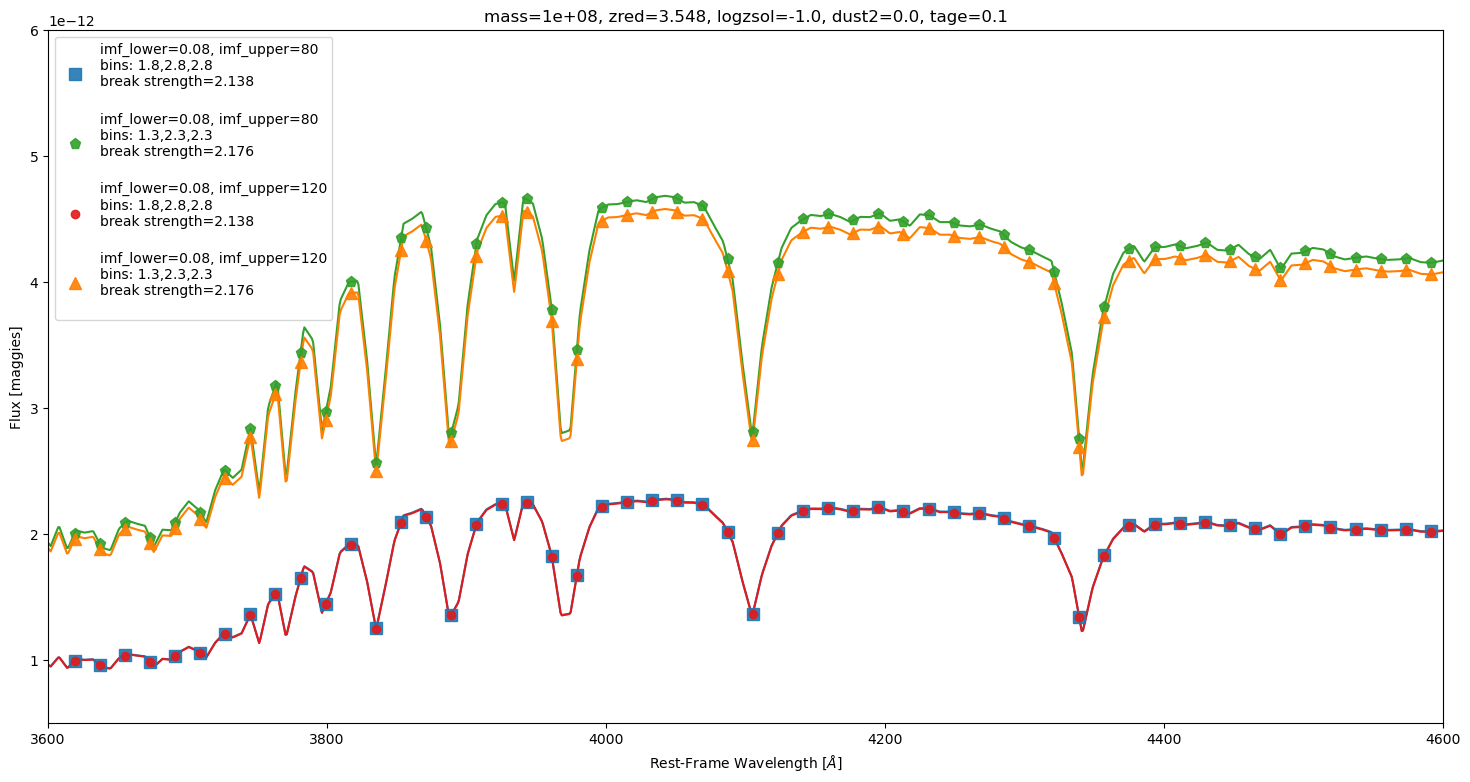

In [101]:
figure(figsize=(18,9))

color = cm.Paired(np.linspace(0, 1, 12))
color = color[1:-1:2]

markers = ['s', 'p', 'o',  '^']
type_of_imf=['imf_lower=0.08, imf_upper=80\nbins: 1.8,2.8,2.8', 
             'imf_lower=0.08, imf_upper=80\nbins: 1.3,2.3,2.3', 
             'imf_lower=0.08, imf_upper=120\nbins: 1.8,2.8,2.8',
             'imf_lower=0.08, imf_upper=120\nbins: 1.3,2.3,2.3']

for n, spec in enumerate(specs):
    if markers[n] == 'o':
        loglog(wspec/a, spec, markers[n], markevery=20, color=color[n], label=f'{type_of_imf[n]}\nbreak strength={data_grid_break[n]:.3f}\n', alpha=0.9, ms=6, zorder=12)
        loglog(wspec/a, spec, color=color[n])
    else:
        loglog(wspec/a, spec, markers[n], markevery=20, color=color[n], label=f'{type_of_imf[n]}\nbreak strength={data_grid_break[n]:.3f}\n', alpha=0.9, ms=8, zorder=12)
        loglog(wspec/a, spec, color=color[n])

# loglog(wspec/a, data_grid_spec[0,0,0,:], markers[-1], markevery=20, color='red', label=f'imf_type=2 (Kroupa)\nbreak strength={data_grid_break[-1]:.3f}', alpha=0.5, ms=8, zorder=12)
# loglog(wspec/a, data_grid_spec[0,0,0,:], color='red')

xlim([3600,4600])
xscale('linear')
yscale('linear')
ylim([.5e-12,6e-12])

xlabel(r'Rest-Frame Wavelength [$\AA$]')
ylabel('Flux [maggies]')

title_text = f'mass={run_params['mass']:.0e}, zred={run_params['zred']}, logzsol={logzs[0]}, dust2={dusts[0]}, tage={tages[0]}'
title(title_text)

legend(fontsize=10)

# savefig('adjusting_imf_bounds_2.png')

show()

In [96]:
color[1:-1:2]

array([[0.12156863, 0.47058824, 0.70588235, 1.        ],
       [0.2       , 0.62745098, 0.17254902, 1.        ],
       [0.89019608, 0.10196078, 0.10980392, 1.        ],
       [1.        , 0.49803922, 0.        , 1.        ],
       [0.41568627, 0.23921569, 0.60392157, 1.        ]])

In [103]:
from prospectFunctions import *

In [104]:
help(getBreakBounds)

Help on function getBreakBounds in module prospectFunctions:

getBreakBounds(wspec, start, zred=None, **extras)



In [108]:
getBreakBounds(wspec, 3620, **run_params)

{'blue': [382, 493], 'red': [804, 915]}

In [113]:
wspec[382:493][[0,-1]]/a, wspec[804:915][[0,-1]]/a, 

(array([3620.7322, 3719.7578]), array([4000.6309, 4099.6568]))

In [24]:
blue_lower, blue_upper = 382, 493
red_lower, red_upper = 804, 915

data_grid_break = np.empty(4)

for i_model in range(len(specs)):
    lower = specs[i_model][blue_lower:blue_upper].mean()
    upper = specs[i_model][red_lower:red_upper].mean()

    ratio = upper/lower

    data_grid_break[i_model] = ratio

# data_grid_break[-1] = data_grid_spec[0,0,0,red_lower:red_upper].mean() / data_grid_spec[0,0,0,blue_lower:blue_upper].mean()

In [25]:
data_grid_break

array([2.13786789, 2.17580257, 2.13786789, 2.17580257])

In [116]:
run_params

{'imf_type': 5,
 'zred': 3.548,
 'mass': 100000000.0,
 'add_duste': False,
 'zcontinuous': 1,
 'logzsol': np.float64(-1.0),
 'dust2': np.float64(0.0),
 'tage': np.float64(0.1)}